In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os
print(os.getcwd())
!ls

/content
drive  sample_data


In [0]:
#script for preparing datasets, loading fer data and generating scaled images 

#loading fer2013.csv

df = pd.read_csv("/content/drive/My Drive/FED/data/fer2013.csv")
data = df['pixels']
data = [ dat.split() for dat in data ]
data = np.array(data)
data = data.astype('float64')
data = [[np.divide(d,255.0) for d in dat] for dat in data]
np.save('/content/drive/My Drive/FED/data/New_Colab_Weights/Scaled.bin.npy',data)
print("Data Ready!")

labels = df['emotion']
labels = np.array(labels)
labels = labels.astype(int)
np.save('/content/drive/My Drive/FED/data/New_Colab_Weights/labels.bin.npy',labels)
print("Labels Ready!")

Data Ready!
Labels Ready!


In [0]:
print(labels)

[0 0 2 ... 0 3 2]


In [0]:
np.random.seed(42)  # for reproducibility

#Load the scaled data, both pixels and labels
X = np.load('/content/drive/My Drive/FED/data/New_Colab_Weights/Scaled.bin.npy')
y = np.load('/content/drive/My Drive/FED/data/New_Colab_Weights/labels.bin.npy')

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [61]:
#reshape the given pixels into 48 X 48 images
shapex , shapey = 48, 48
X_train = X_train.reshape(X_train.shape[0] ,  shapex , shapey,1)
X_test  = X_test.reshape(X_test.shape[0] ,  shapex , shapey,1)


#convert labels to one-hot-encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


#define the model 32 filters in first convolution layer followed by a max pooling and dense layer with dropout (50%)
model = Sequential()
model.add(Convolution2D(64, 5, 5, border_mode='same', input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, 5, 5, border_mode='same', input_shape=(64,64,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, 5, 5, border_mode='same', input_shape=(128,128,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(512, 5, 5, border_mode='same', input_shape=(256,256,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024,init='lecun_uniform'))
model.add(Dropout(0.3))
model.add(Activation('relu'))
model.add(Dense(7))
model.add(Activation('softmax'))

#training the model with cross sgd and nesterov momentum

sgd = SGD(lr=0.055, decay=1e-6, momentum=0.9, nesterov=True)
#optm = RMSprop(lr=0.004, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'] )
# tb = TensorBoard(log_dir='Graph', write_graph=True, write_grads=True, 
#                  write_images=True, histogram_freq=0)

# model.fit(X_train,Y_tr_labels , batch_size=128 , nb_epoch=25, callbacks=[tb])

history = model.fit(X_train, y_train , batch_size=128 , epochs=20)

#save the model weights
json_string = model.to_json()
model.save_weights('/content/drive/My Drive/FED/models/New_Colab_Models/Face_model_weights.h5')
open('/content/drive/My Drive/FED/models/New_Colab_Models/Face_model_architecture.json', 'w').write(json_string)
model.save_weights('/content/drive/My Drive/FED/models/New_Colab_Models/Face_model_weights.h5')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), input_shape=(48, 48, 1..., padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 5), input_shape=(64, 64, 5..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (5, 5), input_shape=(128, 128,..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (5, 5), input_shape=(256, 256,..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, kernel_initializer="lecun_uniform")`


Epoch 1/20
35528/35528 [==============================] - 26s 742us/step - loss: 1.8081 - acc: 0.2488
Epoch 2/20
35528/35528 [==============================] - 25s 710us/step - loss: 1.5785 - acc: 0.3825
Epoch 3/20
35528/35528 [==============================] - 25s 709us/step - loss: 1.3514 - acc: 0.4830
Epoch 4/20
35528/35528 [==============================] - 25s 709us/step - loss: 1.1940 - acc: 0.5467
Epoch 5/20
35528/35528 [==============================] - 25s 709us/step - loss: 1.0592 - acc: 0.6029
Epoch 6/20
35528/35528 [==============================] - 25s 710us/step - loss: 0.9276 - acc: 0.6561
Epoch 7/20
35528/35528 [==============================] - 25s 708us/step - loss: 0.7878 - acc: 0.7101
Epoch 8/20
35528/35528 [==============================] - 25s 712us/step - loss: 0.6586 - acc: 0.7591
Epoch 9/20
35528/35528 [==============================] - 25s 710us/step - loss: 0.5429 - acc: 0.8032
Epoch 10/20
35528/35528 [==============================] - 25s 714us/step - loss: 

dict_keys(['loss', 'acc'])


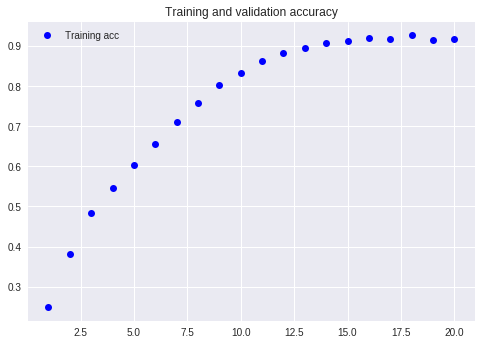

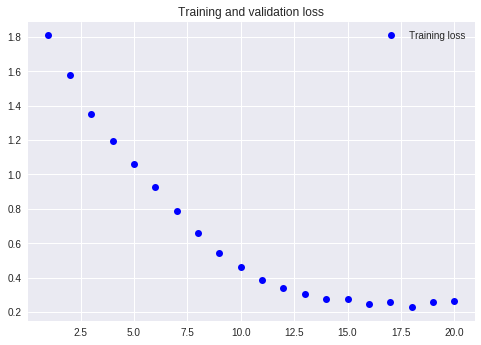

In [62]:
history_dict = history.history
print(history_dict.keys())

acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [63]:
model.evaluate(X_test, y_test)

359/359 [==============================] - 1s 1ms/step


[2.56975265000856, 0.5654596105259441]